In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
dtypes = {
    "year": "category",
    "state": "category",
    "month": "category",
}

In [3]:
df = pd.read_csv('brasil_forest_fires.csv', dtype = dtypes, parse_dates=["date"])
df.head(5)

,year,state,month,number,date
0,1998,AC,JAN,0,1998-01-01
1,1999,AC,JAN,0,1999-01-01
2,2000,AC,JAN,0,2000-01-01
3,2001,AC,JAN,0,2001-01-01
4,2002,AC,JAN,0,2002-01-01


In [4]:
df.dtypes

year            category
state           category
month           category
number             int64
date      datetime64[ns]
dtype: object

In [10]:
n_by_date = df.groupby("date")["number"].sum().reset_index()
n_by_date.tail(10)

,date,number
266,2020-03-01,3880
267,2020-04-01,4117
268,2020-05-01,4002
269,2020-06-01,7109
270,2020-07-01,15805
271,2020-08-01,50694
272,2020-09-01,69329
273,2020-10-01,30418
274,2020-11-01,0
275,2020-12-01,0


In [13]:
df_brazil = n_by_date.rename(columns={'date': 'ds', 'number': 'y'})

,ds,y
0,1998-01-01,0
1,1998-02-01,0
2,1998-03-01,0
3,1998-04-01,0
4,1998-05-01,0
...,...,...
271,2020-08-01,50694
272,2020-09-01,69329
273,2020-10-01,30418
274,2020-11-01,0


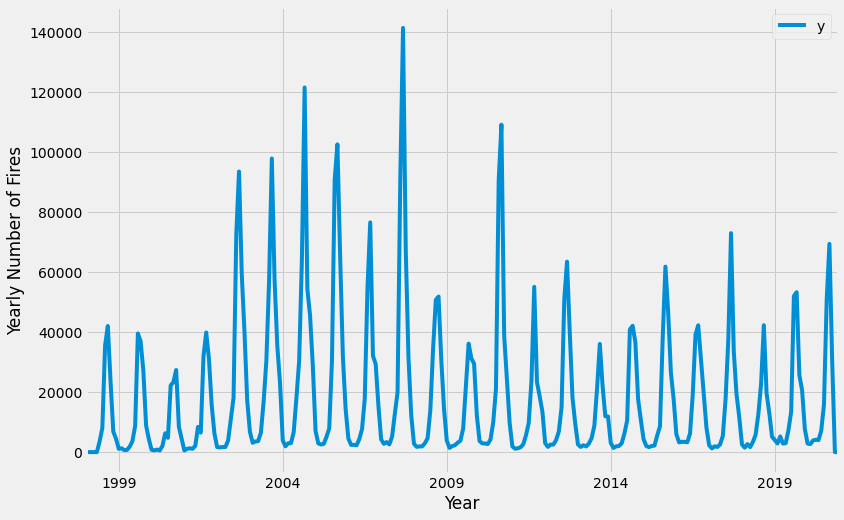

In [29]:
ax = df_brazil.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Yearly Number of Fires')
ax.set_xlabel('Year')

plt.show()

In [38]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.80, weekly_seasonality=True)

In [39]:
my_model.fit(df_brazil)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
307,2023-08-01
308,2023-09-01
309,2023-10-01
310,2023-11-01
311,2023-12-01


In [41]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
307,2023-08-01,37989.342436,23655.970060,51363.806393
308,2023-09-01,59823.491733,45590.002536,74559.698875
309,2023-10-01,27600.847829,12502.308482,41881.811183
310,2023-11-01,15095.270236,512.520156,29430.703016
311,2023-12-01,2419.621756,-12076.120524,15907.193343


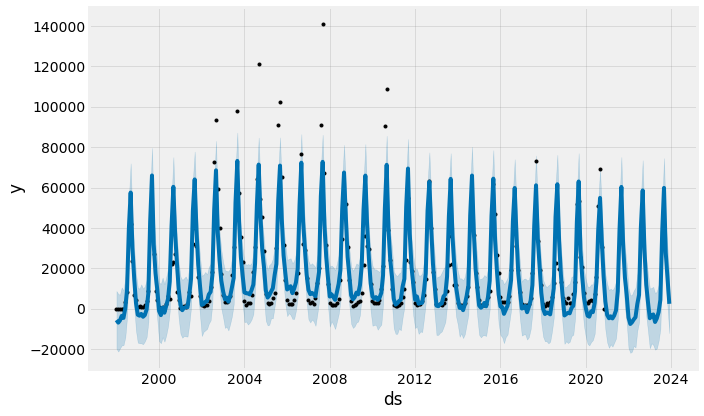

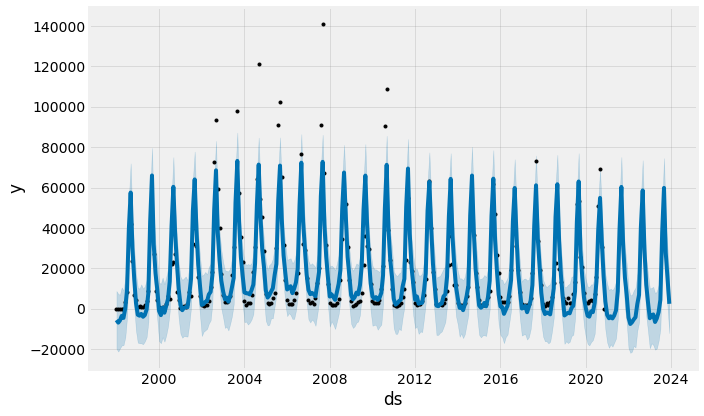

In [42]:
my_model.plot(forecast, uncertainty=True)

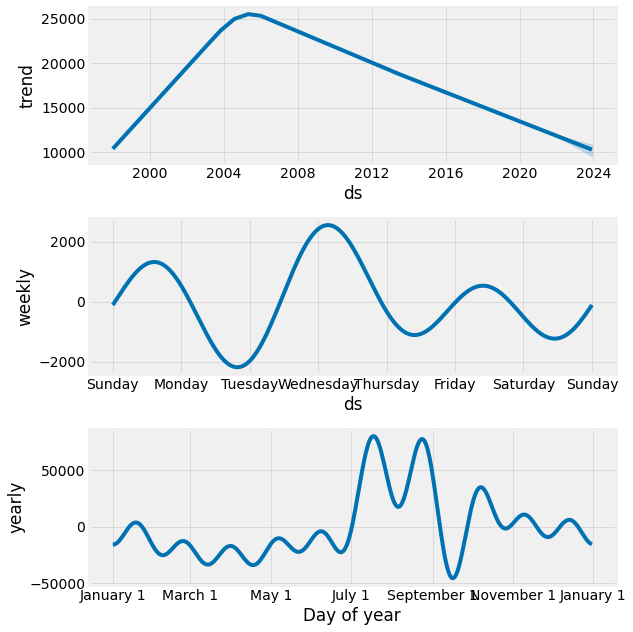

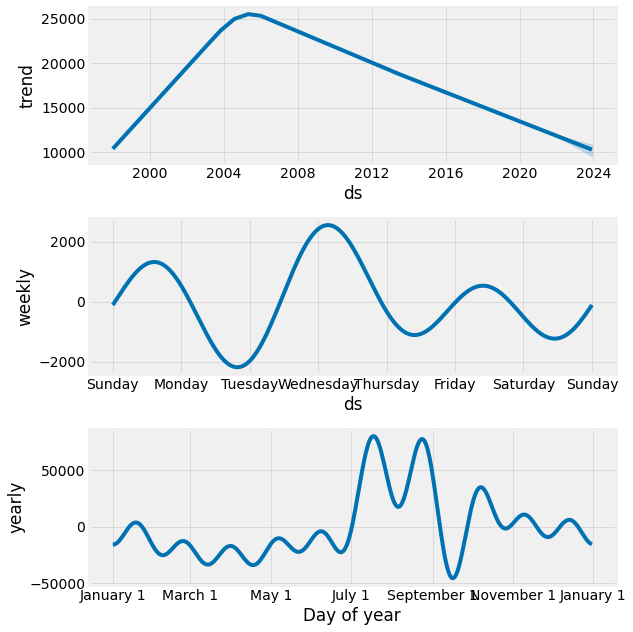

In [43]:
my_model.plot_components(forecast)